# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
#Importing libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import pandas_profiling
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

In [4]:
df = pd.read_excel("Data_Train.xlsx")

# eda

In [5]:
df.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info  Price  
0                      No info   3897  
1                      No info   7662  
2                      No info  13882  
3                      No info   6218  
4                      No info  13302  
5                      No info   3873  
6  In-flight meal not included  11087  
7                      No info  22270  
8  In-flight meal not included  11087  
9                      No info   8625

In [6]:
df.shape # check the data dimension

(10683, 11)

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.columns # check the column names for EDA

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

<AxesSubplot:xlabel='Source', ylabel='count'>

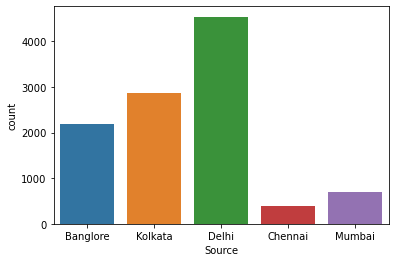

In [15]:
sns.countplot(df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

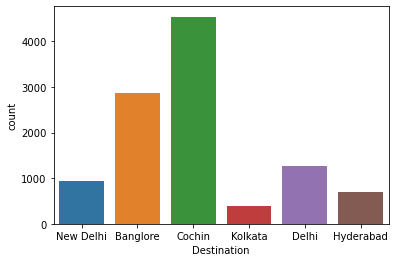

In [16]:
sns.countplot(df['Destination'])

## handle categorical data

In [17]:
#categorical columns in the dataset are as follows:
#'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
#'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
#'Additional_Info'

In [18]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Airline"] = LE.fit_transform(df["Airline"])

In [19]:
df[["day","month","year"]] = df["Date_of_Journey"].str.split("/", expand = True)

In [20]:
df.drop(columns=["Date_of_Journey", "Route", "Additional_Info"], axis = 1, inplace= True)

In [21]:
df["year"].nunique()

1

In [22]:
#since all values are for 2019, year can be dropped
df.drop(columns=["year"], axis = 1, inplace= True)

In [23]:
df["Source"] = LE.fit_transform(df["Source"])
df["Destination"] = LE.fit_transform(df["Destination"])

In [24]:
df

Airline  Source  Destination Dep_Time  Arrival_Time Duration  \
0            3       0            5    22:20  01:10 22 Mar   2h 50m   
1            1       3            0    05:50         13:15   7h 25m   
2            4       2            1    09:25  04:25 10 Jun      19h   
3            3       3            0    18:05         23:30   5h 25m   
4            3       0            5    16:50         21:35   4h 45m   
...        ...     ...          ...      ...           ...      ...   
10678        0       3            0    19:55         22:25   2h 30m   
10679        1       3            0    20:45         23:20   2h 35m   
10680        4       0            2    08:20         11:20       3h   
10681       10       0            5    11:30         14:10   2h 40m   
10682        1       2            1    10:55         19:15   8h 20m   

      Total_Stops  Price day month  
0        non-stop   3897  24    03  
1         2 stops   7662   1    05  
2         2 stops  13882   9    06  
3          1 stop   6218  12    05  
4          1 stop  13302  01    03  
...           ...    ...  ..   ...  
10678    non-stop   4107   9    04  
10679    non-stop   4145  27    04  
10680    non-stop   7229  27    04  
10681    non-stop  12648  01    03  
10682     2 stops  11753   9    05  

[10683 rows x 10 columns]

In [25]:
df["Duration"] = df["Duration"].astype(str)
df["Total_Stops"] = df["Total_Stops"].astype(str)

In [26]:
for i in range(0,len(df)):
    df["Duration"][i] = df["Duration"][i][0]
    df["Total_Stops"][i] = df["Total_Stops"][i][0]

In [27]:
for i in range(0,len(df)):
    df["Total_Stops"][i] = df["Total_Stops"][i].replace("n", "0")

In [28]:
for i in range(0,len(df)):
    df["Arrival_Time"][i] = df["Arrival_Time"][i][0:5]
    df["Arrival_Time"][i] = df["Arrival_Time"][i].replace(":","")
    df["Dep_Time"][i] = df["Dep_Time"][i].replace(":","")

In [29]:
df

Airline  Source  Destination Dep_Time Arrival_Time Duration  \
0            3       0            5     2220         0110        2   
1            1       3            0     0550         1315        7   
2            4       2            1     0925         0425        1   
3            3       3            0     1805         2330        5   
4            3       0            5     1650         2135        4   
...        ...     ...          ...      ...          ...      ...   
10678        0       3            0     1955         2225        2   
10679        1       3            0     2045         2320        2   
10680        4       0            2     0820         1120        3   
10681       10       0            5     1130         1410        2   
10682        1       2            1     1055         1915        8   

      Total_Stops  Price day month  
0               0   3897  24    03  
1               2   7662   1    05  
2               2  13882   9    06  
3               1   6218  12    05  
4               1  13302  01    03  
...           ...    ...  ..   ...  
10678           0   4107   9    04  
10679           0   4145  27    04  
10680           0   7229  27    04  
10681           0  12648  01    03  
10682           2  11753   9    05  

[10683 rows x 10 columns]

In [30]:
df.dtypes

Airline          int32
Source           int32
Destination      int32
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
Price            int64
day             object
month           object
dtype: object

In [31]:
df = df.astype(int)

In [32]:
df.dtypes

Airline         int32
Source          int32
Destination     int32
Dep_Time        int32
Arrival_Time    int32
Duration        int32
Total_Stops     int32
Price           int32
day             int32
month           int32
dtype: object

In [33]:
#Checking the distribution of values of each column

Airline


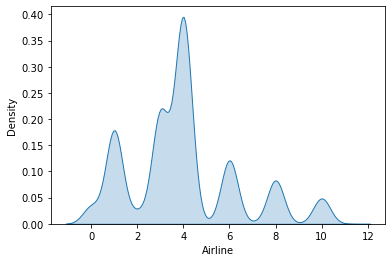

Source


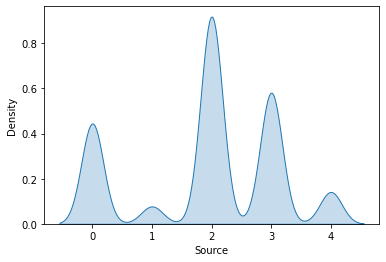

Destination


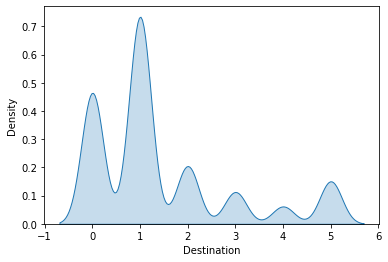

Dep_Time


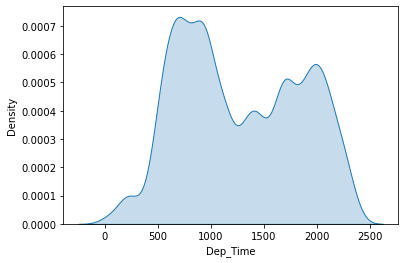

Arrival_Time


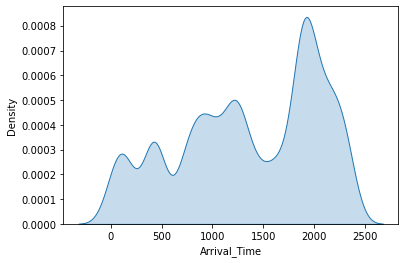

Duration


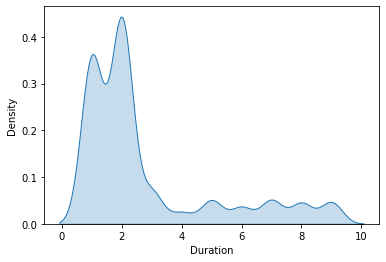

Total_Stops


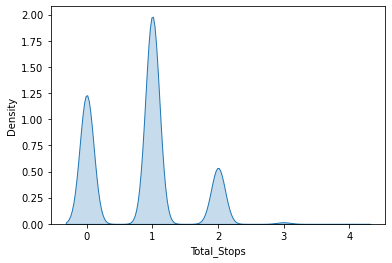

Price


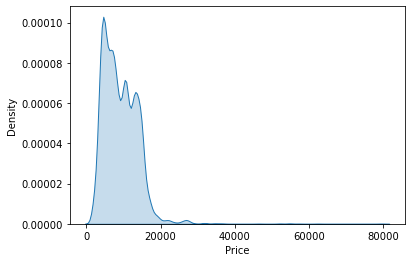

day


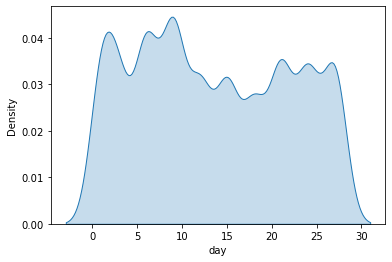

month


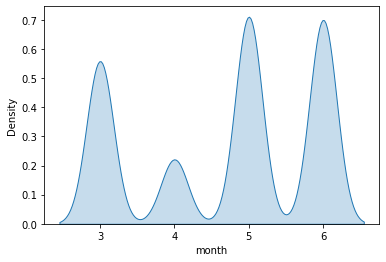

In [34]:
for col in df:
    print(col)
    
    plt.figure()
    sns.kdeplot(df[col], shade = True)
    plt.show()

In [35]:
pre_profile = df.profile_report(title="flight price")
#pre_profile.to_file(output_file="avocado.html")

In [36]:
pre_profile

## check for outliers

In [37]:
#remove outliers before skewness check and before x, y split

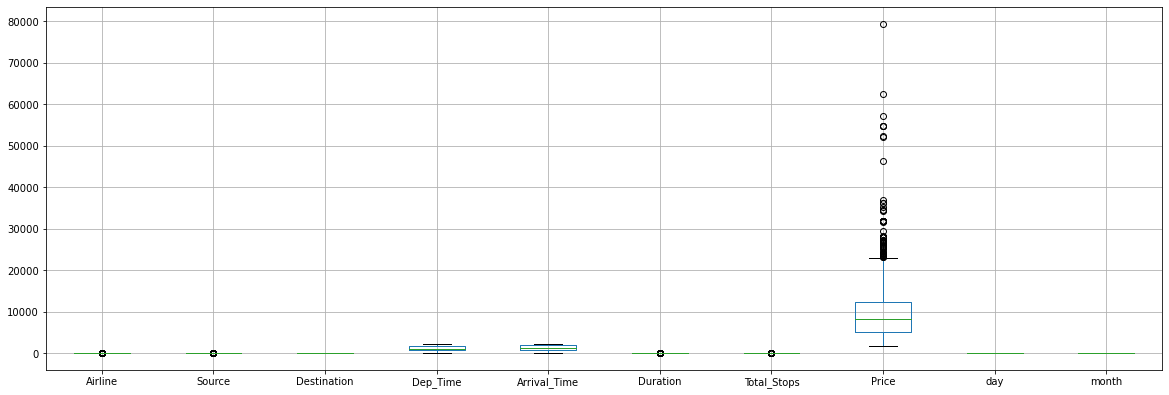

In [38]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [39]:
#Removing outliers by z score

In [40]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [41]:
new_df.shape

(10541, 10)

In [42]:
df.shape

(10683, 10)

In [43]:
dataloss = ((10683-10541)/10683)*100

In [44]:
dataloss

1.3292146400823739

In [45]:
#Data loss is negligible, hence dropping outliers
df = new_df

## check co-relation

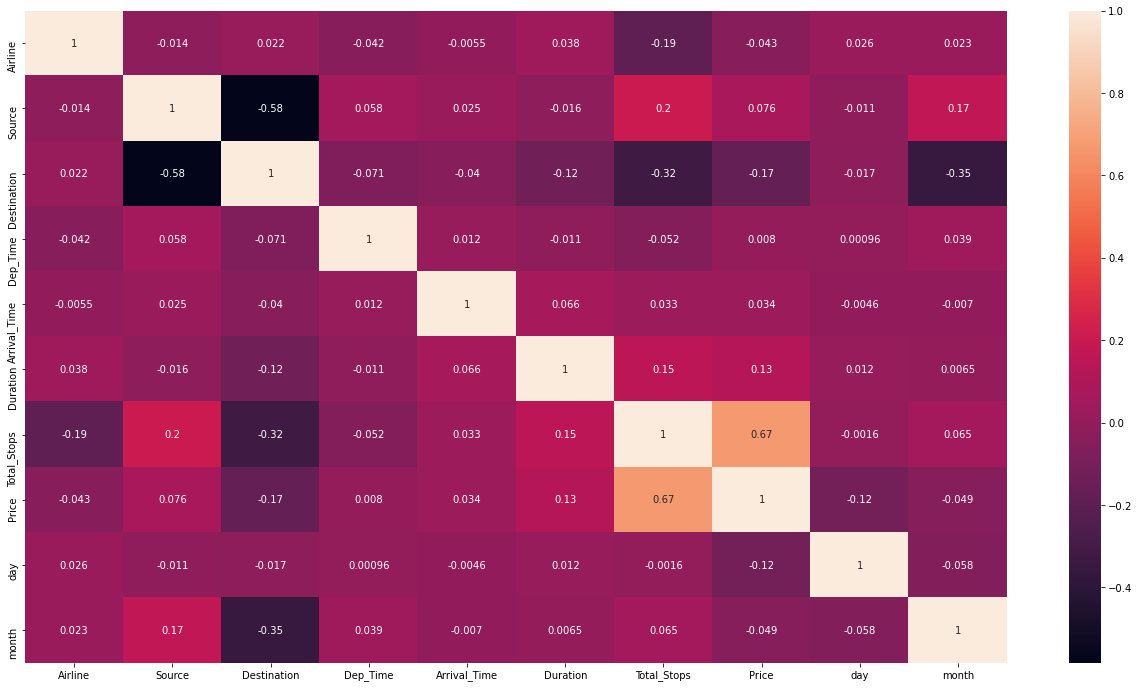

In [46]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [47]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [48]:
cor["Price"].sort_values(ascending=False)

Price           1.000000
Total_Stops     0.670373
Duration        0.126816
Source          0.075584
Arrival_Time    0.033870
Dep_Time        0.008006
Airline        -0.043091
month          -0.048553
day            -0.117294
Destination    -0.174427
Name: Price, dtype: float64

In [49]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'day', 'month'],
      dtype='object')

In [50]:
columns = ['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'day', 'month']

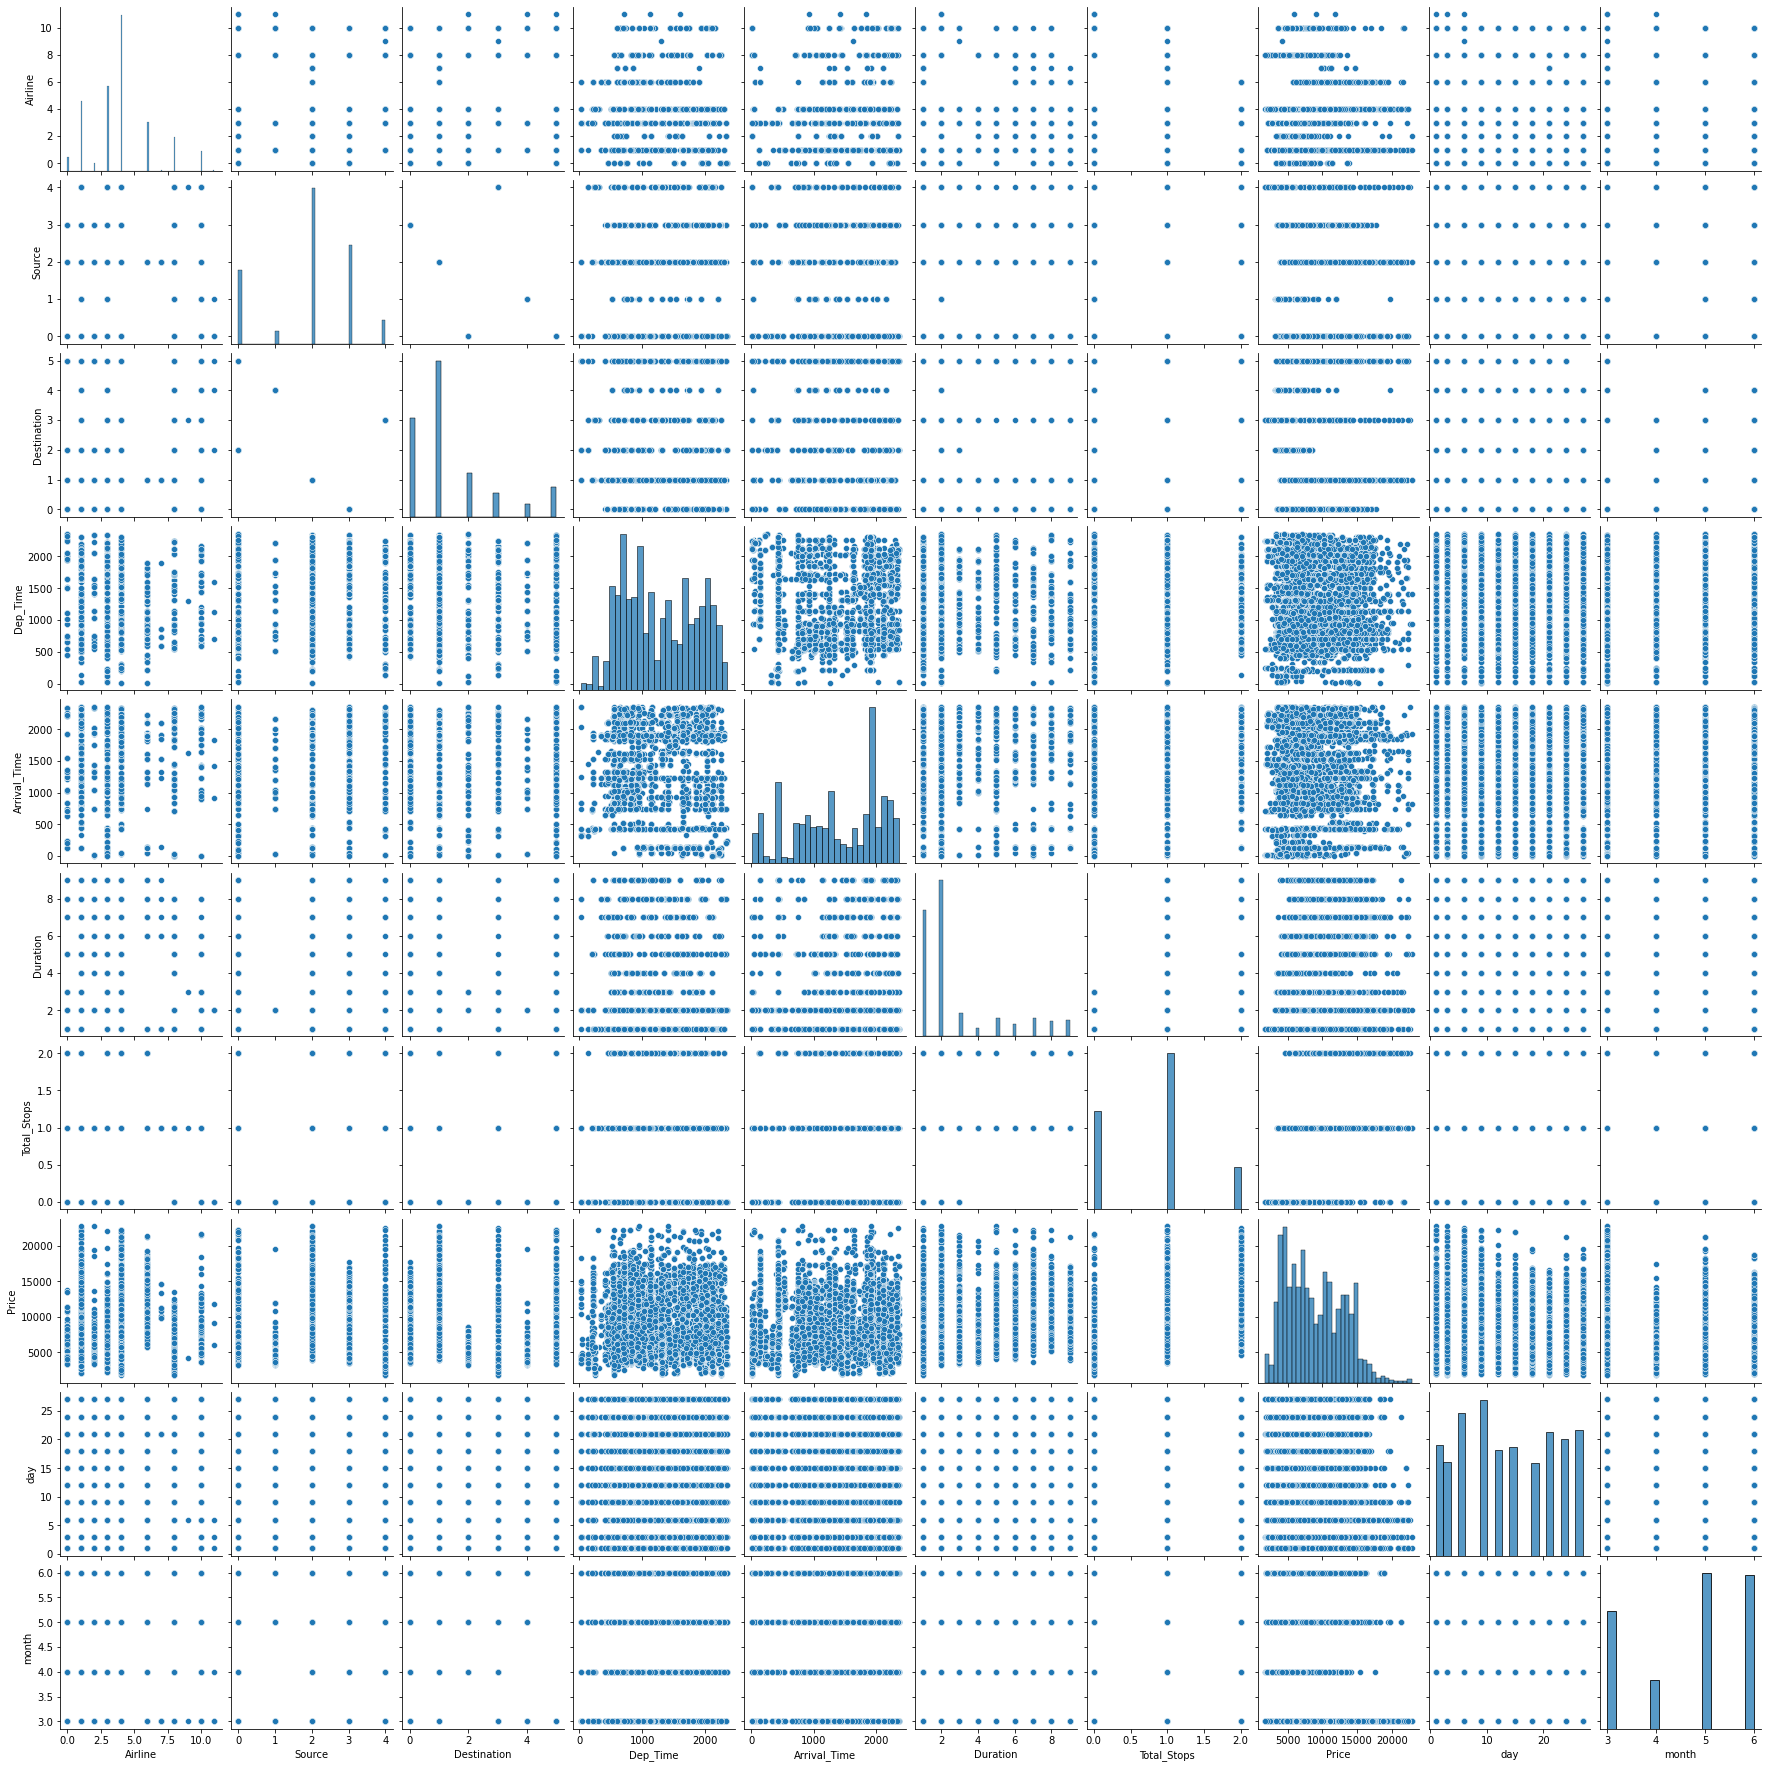

In [88]:
sns.pairplot(df[columns])

## check for skewness

In [51]:
x = df.drop('Price',axis=1)
y = df['Price']

Airline
0.731987391377968


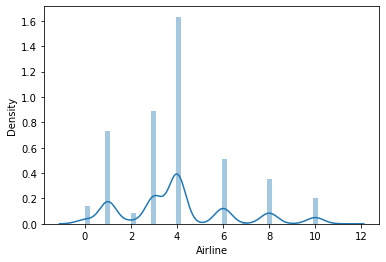

Source
-0.43704923453196143


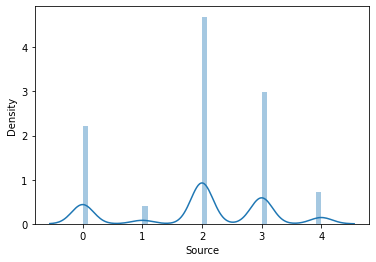

Destination
1.266123780851388


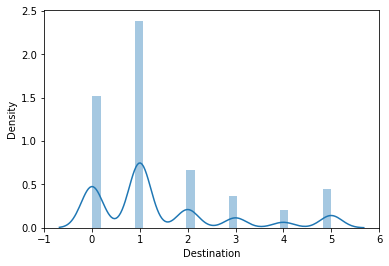

Dep_Time
0.11521200187673897


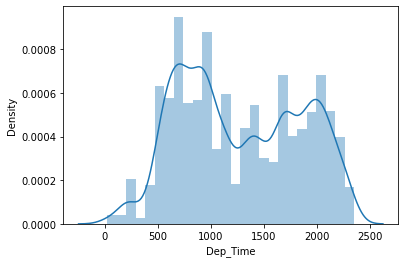

Arrival_Time
-0.3707662221010415


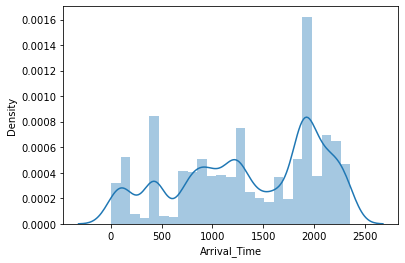

Duration
1.4906161738545236


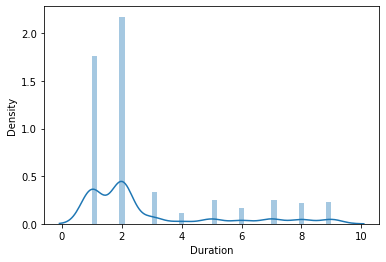

Total_Stops
0.22723977285159083


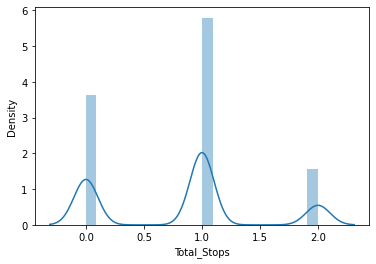

Price
0.41518042351056006


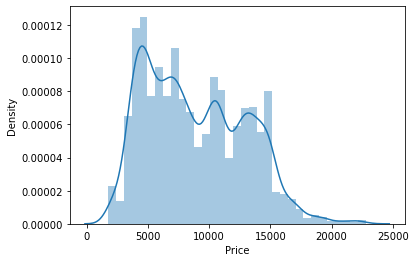

day
0.1094324451726097


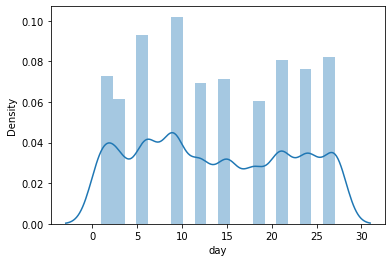

month
-0.40896805327801206


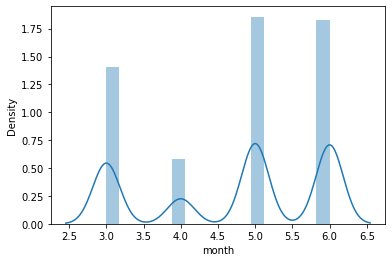

In [52]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [53]:
x.skew() # check skewness

Airline         0.732092
Source         -0.437111
Destination     1.266304
Dep_Time        0.115228
Arrival_Time   -0.370819
Duration        1.490828
Total_Stops     0.227272
day             0.109448
month          -0.409026
dtype: float64

In [54]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [55]:
df_new.skew()

Airline        -0.014454
Source         -0.235084
Destination     0.040804
Dep_Time       -0.113476
Arrival_Time   -0.440023
Duration        0.216489
Total_Stops    -0.071360
day            -0.203104
month          -0.221736
dtype: float64

In [56]:
df_new

Airline    Source  Destination  Dep_Time  Arrival_Time  Duration  \
0     -0.299723 -1.613132     1.777244  1.535912     -1.880946  0.044016   
1     -1.423387  0.897253    -1.367085 -1.303739     -0.040048  1.558075   
2      0.143223 -0.025844     0.018931 -0.548147     -1.366763 -1.213893   
3     -0.299723  0.897253    -1.367085  0.923770      1.386440  1.262858   
4     -0.299723 -1.613132     1.777244  0.684300      1.116859  1.023371   
...         ...       ...          ...       ...           ...       ...   
10536 -2.245972  0.897253    -1.367085  1.149566      1.241503  0.044016   
10537 -1.423387  0.897253    -1.367085  1.282483      1.372658  0.044016   
10538  0.143223 -1.613132     0.724834 -0.748239     -0.322341  0.659685   
10539  2.117835 -1.613132     1.777244 -0.176456      0.096300  0.044016   
10540 -1.423387 -0.025844     0.018931 -0.309825      0.810451  1.655249   

       Total_Stops       day     month  
0        -1.290068  1.160735 -1.416451  
1         1.625873 -1.735060  0.142149  
2         1.625873 -0.425623  1.172580  
3         0.370988 -0.059270  0.142149  
4         0.370988 -1.735060 -1.416451  
...            ...       ...       ...  
10536    -1.290068 -0.425623 -0.720185  
10537    -1.290068  1.427161 -0.720185  
10538    -1.290068  1.427161 -0.720185  
10539    -1.290068 -1.735060 -1.416451  
10540     1.625873 -0.425623  0.142149  

[10541 rows x 9 columns]

In [57]:
x

Airline  Source  Destination  Dep_Time  Arrival_Time  Duration  \
0            3       0            5      2220           110         2   
1            1       3            0       550          1315         7   
2            4       2            1       925           425         1   
3            3       3            0      1805          2330         5   
4            3       0            5      1650          2135         4   
...        ...     ...          ...       ...           ...       ...   
10678        0       3            0      1955          2225         2   
10679        1       3            0      2045          2320         2   
10680        4       0            2       820          1120         3   
10681       10       0            5      1130          1410         2   
10682        1       2            1      1055          1915         8   

       Total_Stops  day  month  
0                0   24      3  
1                2    1      5  
2                2    9      6  
3                1   12      5  
4                1    1      3  
...            ...  ...    ...  
10678            0    9      4  
10679            0   27      4  
10680            0   27      4  
10681            0    1      3  
10682            2    9      5  

[10541 rows x 9 columns]

In [58]:
x = df_new

## finding the best random state

In [59]:
from sklearn.metrics import r2_score

In [60]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = r2_score(y_test, predLR)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.53582779050782  on Random State  59


## test train split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=59)

## regression

In [62]:
#Linear Regression

MAE: 2194.552032585386
MSE: 7725269.786149219
RMSE: 2779.43695487939
Variance: 0.5358367803808664
R2 Score: 0.53582779050782


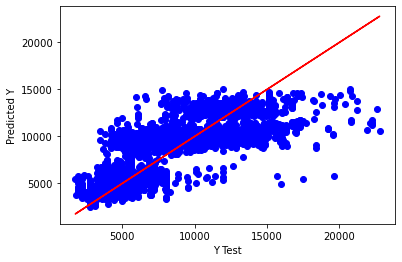

In [66]:
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
acc = r2_score(y_test, predLR)
acc
plt.scatter(y_test,predLR,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, predLR))
print('MSE:', metrics.mean_squared_error(y_test, predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))
print('Variance:', metrics.explained_variance_score(y_test, predLR))
print('R2 Score:', r2_score(y_test, predLR))

## Cross-validation of the model

In [67]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(LR, x, y, cv = j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {acc}")
    print("\n")

At cross fold 2 the cv score is 0.5107967858926861 and accuracy score for training is 0.53582779050782


At cross fold 3 the cv score is 0.5111576025397495 and accuracy score for training is 0.53582779050782


At cross fold 4 the cv score is 0.5114362959023608 and accuracy score for training is 0.53582779050782


At cross fold 5 the cv score is 0.5112826466848748 and accuracy score for training is 0.53582779050782


At cross fold 6 the cv score is 0.511009954024671 and accuracy score for training is 0.53582779050782


At cross fold 7 the cv score is 0.510997253701374 and accuracy score for training is 0.53582779050782


At cross fold 8 the cv score is 0.5113626209578535 and accuracy score for training is 0.53582779050782


At cross fold 9 the cv score is 0.5114904048778174 and accuracy score for training is 0.53582779050782




In [68]:
#Since number of folds don't have much impact on the accuracy and cv_score, 
#cv = 5 is selected

## Regularization

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [70]:
from sklearn.linear_model import Lasso

parameters = {'alpha': [.0001, .001, .01, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [71]:
ls = Lasso(alpha=1, random_state= 0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

pred_ls = ls.predict(x_test)

lss = r2_score(y_test, pred_ls)
lss

0.5358281427003027

In [72]:
#CatBoostRegressor

0:	learn: 3190.6871361	total: 182ms	remaining: 1.63s
1:	learn: 2883.4377121	total: 186ms	remaining: 743ms
2:	learn: 2786.8539370	total: 188ms	remaining: 440ms
3:	learn: 2665.7400627	total: 191ms	remaining: 287ms
4:	learn: 2606.7928072	total: 193ms	remaining: 193ms
5:	learn: 2536.0323860	total: 196ms	remaining: 130ms
6:	learn: 2489.9000649	total: 197ms	remaining: 84.6ms
7:	learn: 2462.4718291	total: 199ms	remaining: 49.8ms
8:	learn: 2448.2668301	total: 201ms	remaining: 22.3ms
9:	learn: 2421.5274621	total: 202ms	remaining: 0us
MAE: 1808.7806403428372
MSE: 5573756.674025824
RMSE: 2360.8804870272074
R2 Score 0.665101281615697
Variance: 0.6651020384937714


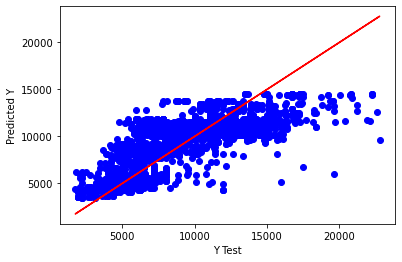

In [73]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 Score', r2_score(y_test, preds))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [74]:
#decisiontreeregressor

MAE: 1708.4866492921017
MSE: 5187955.870919908
RMSE: 2277.708469255868
Variance: 0.6882822884114064
R2 Score: 0.6882820916273555


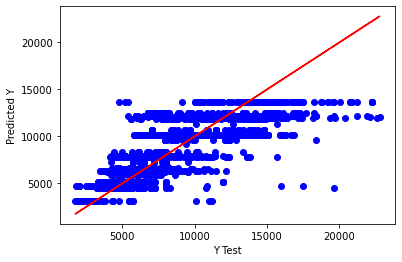

In [75]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

## hyper parameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 10, 'min_samples_split': 10}
3584896.852771991


MAE: 1338.4353162219593
MSE: 3591487.8387284637
RMSE: 1895.1221171018146
Variance: 0.7842061436158307
R2 Score: 0.7842057440562394


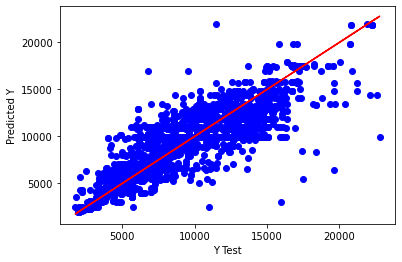

In [77]:
new_model = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=20)
new_model.fit(x_train, y_train)
preds = new_model.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

## working on the test data

In [78]:
x_test = pd.read_excel("Test_set.xlsx")

# eda

In [79]:
x_test.head(10)

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   
5        Jet Airways      12/06/2019     Delhi      Cochin  DEL → BOM → COK   
6          Air India      12/03/2019  Banglore   New Delhi  BLR → TRV → DEL   
7             IndiGo       1/05/2019   Kolkata    Banglore  CCU → HYD → BLR   
8             IndiGo      15/03/2019   Kolkata    Banglore        CCU → BLR   
9        Jet Airways      18/05/2019   Kolkata    Banglore  CCU → BOM → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  
5    18:15  12:35 13 Jun  18h 20m      1 stop  In-flight meal not included  
6    07:30         22:35   15h 5m      1 stop                      No info  
7    15:15         20:30   5h 15m      1 stop                      No info  
8    10:10         12:55   2h 45m    non-stop                      No info  
9    16:30         22:35    6h 5m      1 stop                      No info

In [80]:
x_test.shape # check the data dimension

(2671, 10)

In [81]:
x_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [82]:
x_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [83]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [84]:
x_test.columns # check the column names for EDA

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [85]:
x_test.describe()

Airline Date_of_Journey Source Destination            Route  \
count          2671            2671   2671        2671             2671   
unique           11              44      5           6              100   
top     Jet Airways       9/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq            897             144   1145        1145              624   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count      2671         2671     2671        2671            2671  
unique      199          704      320           5               6  
top       10:00        19:00   2h 50m      1 stop         No info  
freq         62          113      122        1431            2148

## handle categorical data

In [86]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
x_test["Airline"] = LE.fit_transform(x_test["Airline"])

In [87]:
x_test[["day","month","year"]] = x_test["Date_of_Journey"].str.split("/", expand = True)

In [88]:
x_test.drop(columns=["Date_of_Journey", "Route", "Additional_Info"], axis = 1, inplace= True)

In [89]:
x_test["year"].nunique()

1

In [90]:
#since all values are for 2019, year can be dropped
x_test.drop(columns=["year"], axis = 1, inplace= True)

In [91]:
x_test["Source"] = LE.fit_transform(x_test["Source"])
x_test["Destination"] = LE.fit_transform(x_test["Destination"])

In [92]:
x_test

Airline  Source  Destination Dep_Time  Arrival_Time Duration  \
0           4       2            1    17:30  04:25 07 Jun  10h 55m   
1           3       3            0    06:20         10:20       4h   
2           4       2            1    19:15  19:00 22 May  23h 45m   
3           6       2            1    08:00         21:00      13h   
4           0       0            2    23:55  02:45 25 Jun   2h 50m   
...       ...     ...          ...      ...           ...      ...   
2666        1       3            0    20:30  20:25 07 Jun  23h 55m   
2667        3       3            0    14:20         16:55   2h 35m   
2668        4       2            1    21:50  04:25 07 Mar   6h 35m   
2669        1       2            1    04:00         19:15  15h 15m   
2670        6       2            1    04:55         19:15  14h 20m   

     Total_Stops day month  
0         1 stop   6    06  
1         1 stop  12    05  
2         1 stop  21    05  
3         1 stop  21    05  
4       non-stop  24    06  
...          ...  ..   ...  
2666      1 stop   6    06  
2667    non-stop  27    03  
2668      1 stop   6    03  
2669      1 stop   6    03  
2670      1 stop  15    06  

[2671 rows x 9 columns]

In [93]:
x_test["Duration"] = x_test["Duration"].astype(str)
x_test["Total_Stops"] = x_test["Total_Stops"].astype(str)

In [94]:
for i in range(0,len(x_test)):
    x_test["Duration"][i] = x_test["Duration"][i][0]
    x_test["Total_Stops"][i] = x_test["Total_Stops"][i][0]

In [95]:
for i in range(0,len(x_test)):
    x_test["Total_Stops"][i] = x_test["Total_Stops"][i].replace("n", "0")

In [96]:
for i in range(0,len(x_test)):
    x_test["Arrival_Time"][i] = x_test["Arrival_Time"][i][0:5]
    x_test["Arrival_Time"][i] = x_test["Arrival_Time"][i].replace(":","")
    x_test["Dep_Time"][i] = x_test["Dep_Time"][i].replace(":","")

In [97]:
x_test

Airline  Source  Destination Dep_Time Arrival_Time Duration Total_Stops  \
0           4       2            1     1730         0425        1           1   
1           3       3            0     0620         1020        4           1   
2           4       2            1     1915         1900        2           1   
3           6       2            1     0800         2100        1           1   
4           0       0            2     2355         0245        2           0   
...       ...     ...          ...      ...          ...      ...         ...   
2666        1       3            0     2030         2025        2           1   
2667        3       3            0     1420         1655        2           0   
2668        4       2            1     2150         0425        6           1   
2669        1       2            1     0400         1915        1           1   
2670        6       2            1     0455         1915        1           1   

     day month  
0      6    06  
1     12    05  
2     21    05  
3     21    05  
4     24    06  
...   ..   ...  
2666   6    06  
2667  27    03  
2668   6    03  
2669   6    03  
2670  15    06  

[2671 rows x 9 columns]

In [98]:
x_test.dtypes

Airline          int32
Source           int32
Destination      int32
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
day             object
month           object
dtype: object

In [99]:
x_test = x_test.astype(int)

In [100]:
x_test.dtypes

Airline         int32
Source          int32
Destination     int32
Dep_Time        int32
Arrival_Time    int32
Duration        int32
Total_Stops     int32
day             int32
month           int32
dtype: object

## check for outliers

In [101]:
#remove outliers before skewness check and before x, y split

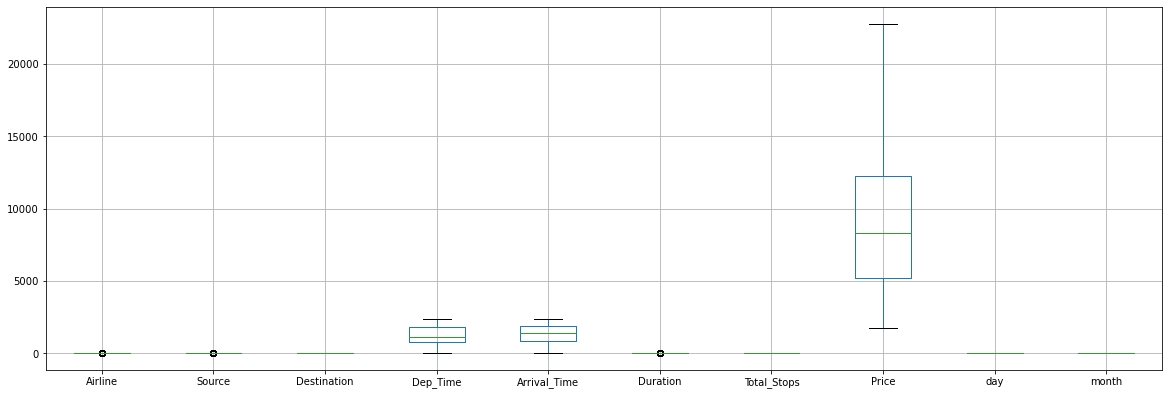

In [102]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [103]:
#Removing outliers by z score

In [104]:
from scipy.stats import zscore
z = np.abs(zscore(x_test))
new_df = x_test[(z<3).all(axis=1)]

In [105]:
new_df.shape

(2659, 9)

In [106]:
x_test.shape

(2671, 9)

In [107]:
dataloss = ((2671-2659)/2671)*100

In [108]:
dataloss

0.44926993635342566

In [109]:
#Data loss is negligible, hence dropping outliers
x_test = new_df

## check for skewness

In [110]:
x_test.skew() # check skewness

Airline         0.482865
Source         -0.423251
Destination     1.262024
Dep_Time        0.097679
Arrival_Time   -0.443477
Duration        1.449125
Total_Stops     0.202178
day             0.199729
month          -0.407966
dtype: float64

In [111]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x_test)

df_new = pd.DataFrame(df_new, columns = x_test.columns)

In [112]:
df_new.skew()

Airline        -0.042926
Source         -0.238297
Destination     0.039494
Dep_Time       -0.114226
Arrival_Time   -0.499037
Duration        0.228801
Total_Stops    -0.075457
day            -0.179598
month          -0.228122
dtype: float64

In [113]:
df_new

Airline    Source  Destination  Dep_Time  Arrival_Time  Duration  \
0     0.116234 -0.019721     0.002715  0.795705     -1.362212 -1.178590   
1    -0.330809  0.887104    -1.379248 -1.193512     -0.492210  1.016567   
2     0.116234 -0.019721     0.002715  1.082561      0.736691  0.053474   
3     0.902563 -0.019721     0.002715 -0.824634      1.010135 -1.178590   
4    -2.160361 -1.597745     0.708400  1.734026     -1.638327  0.053474   
...        ...       ...          ...       ...           ...       ...   
2654 -1.417146  0.887104    -1.379248  1.256746      0.907798  0.053474   
2655 -0.330809  0.887104    -1.379248  0.293648      0.399176  0.053474   
2656  0.116234 -0.019721     0.002715  1.435426     -1.362212  1.420159   
2657 -1.417146 -0.019721     0.002715 -1.691520      0.757261 -1.178590   
2658  0.902563 -0.019721     0.002715 -1.560735      0.757261 -1.178590   

      Total_Stops       day     month  
0        0.345942 -0.754270  1.160586  
1        0.345942  0.038920  0.140715  
2        0.345942  0.969579  0.140715  
3        0.345942  0.969579  0.140715  
4       -1.315164  1.240725  1.160586  
...           ...       ...       ...  
2654     0.345942 -0.754270  1.160586  
2655    -1.315164  1.498064 -1.402695  
2656     0.345942 -0.754270 -1.402695  
2657     0.345942 -0.754270 -1.402695  
2658     0.345942  0.373548  1.160586  

[2659 rows x 9 columns]

In [114]:
x_test

Airline  Source  Destination  Dep_Time  Arrival_Time  Duration  \
0           4       2            1      1730           425         1   
1           3       3            0       620          1020         4   
2           4       2            1      1915          1900         2   
3           6       2            1       800          2100         1   
4           0       0            2      2355           245         2   
...       ...     ...          ...       ...           ...       ...   
2666        1       3            0      2030          2025         2   
2667        3       3            0      1420          1655         2   
2668        4       2            1      2150           425         6   
2669        1       2            1       400          1915         1   
2670        6       2            1       455          1915         1   

      Total_Stops  day  month  
0               1    6      6  
1               1   12      5  
2               1   21      5  
3               1   21      5  
4               0   24      6  
...           ...  ...    ...  
2666            1    6      6  
2667            0   27      3  
2668            1    6      3  
2669            1    6      3  
2670            1   15      6  

[2659 rows x 9 columns]

In [115]:
x_test = df_new

In [116]:
new_model = DecisionTreeRegressor(max_depth=4, min_samples_split=20)
new_model.fit(x_train, y_train)
predictions = new_model.predict(x_test)

In [117]:
submission = pd.DataFrame()
submission['Price']=  predictions
submission.head()

Price
0  12773.098645
1   6973.187339
2  12773.098645
3  10784.397311
4   4763.926258

In [118]:
submission

Price
0     12773.098645
1      6973.187339
2     12773.098645
3     10784.397311
4      4763.926258
...            ...
2654   6973.187339
2655   4763.926258
2656  12773.098645
2657   9430.108025
2658  10784.397311

[2659 rows x 1 columns]

In [119]:
submission.to_csv('submission.csv',index=False)